In [1]:
import numpy as np 
import pandas as pd
import os
import joblib
import sklearn 
import matplotlib
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

#Regressions:

from sklearn.multioutput import MultiOutputRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

#Metric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


from pandas import DataFrame


# Show progress bar
from tqdm import tqdm

In [2]:
df = pd.read_csv('flo_dataset_augmented.csv')
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,in_amount_mmol,p_amount_mmol,ligand_amount_mmol,first_sol_amount_ml,second_sol_amount_ml,third_sol_amount_ml,...,x6_zinc undecylenate,x7_None,x7_copper bromide,x7_oleic acid,x7_water,x7_zinc iodide,diameter_nm,abs_nm,emission_nm,Unnamed: 81
0,0,0,0,0,0.154575,-0.011188,-0.247025,-0.673379,-0.370637,-0.096002,...,0,1,0,0,0,0,2.4300,480.000000,539.000000,59.000000
1,1,1,1,1,0.195883,0.280681,-0.439228,-0.658075,-0.370637,-0.096002,...,0,1,0,0,0,0,2.6100,610.000000,653.000000,43.000000
2,2,2,2,2,-0.423738,-0.412509,-0.439228,-0.655198,-0.370637,-0.096002,...,0,1,0,0,0,0,2.8435,560.000000,595.000000,35.000000
3,3,3,3,3,-0.423738,-0.412509,-0.439228,-0.655198,-0.370637,-0.096002,...,0,1,0,0,0,0,3.0560,590.000000,635.000000,45.000000
4,4,5,5,5,0.154575,-0.011188,-0.247025,-0.604513,-0.370637,-0.096002,...,0,1,0,0,0,0,2.7800,500.827586,520.000000,19.172414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,211,214,214,214,0.154575,-0.376755,0.713993,4.491519,-0.370637,-0.096002,...,0,1,0,0,0,0,4.0000,585.000000,630.000000,45.000000
212,212,215,215,215,7.590031,7.504453,-0.439228,5.524499,-0.370637,-0.096002,...,0,1,0,0,0,0,3.0550,465.000000,550.000000,85.000000
213,213,216,216,216,2.633061,0.718486,4.173657,6.213152,4.521657,-0.096002,...,0,1,0,0,0,0,2.0800,465.000000,584.833333,119.833333
214,214,217,217,217,2.633061,0.718486,4.173657,6.213152,4.521657,-0.096002,...,0,1,0,0,0,0,2.7900,495.000000,594.833333,99.833333


In [3]:
# Input for ML models


input_col = ['in_amount_mmol', 'p_amount_mmol', 'ligand_amount_mmol',
       'first_sol_amount_ml', 'second_sol_amount_ml', 'third_sol_amount_ml',
       'other_1_amount_mmol', 'other_2_amount_mmol', 'total_volume_ml',
       'temp_c', 'time_min', 'x0_chloroindium oxalate', 'x0_indium acetate',
       'x0_indium bromide', 'x0_indium chloride', 'x0_indium iodide',
       'x0_indium myristate', 'x0_indium oxalate', 'x0_indium palmitate',
       'x0_indium trifluoroacetate',
       'x0_indium tris(N,N-diisopropylacetamidinato)',
       'x1_bis(trimethylsilyl)phosphine', 'x1_phosphine gas',
       'x1_phosphorus trichloride', 'x1_sodium phosphide',
       'x1_tris(diethylamino)phosphine', 'x1_tris(dimethylamino)phosphine',
       'x1_tris(trimethylgermyl)phosphine', 'x1_tris(trimethylsilyl)phosphine',
       'x1_white phosphorus', 'x2_None', 'x2_dodecanethiol', 'x2_lauric acid',
       'x2_myristic acid', 'x2_oleic acid', 'x2_palmitic acid',
       'x2_stearic acid', 'x3_4-ethylpyridine', 'x3_None',
       'x3_dimethylformamide', 'x3_dodecylamine', 'x3_mesitylene',
       'x3_octadecene', 'x3_oleylamine', 'x3_trioctylamine',
       'x3_trioctylphosphine', 'x3_trioctylphosphine oxide', 'x4_None',
       'x4_dioctyl ether', 'x4_dioctylamine', 'x4_hexadecylamine',
       'x4_octylamine', 'x4_oleylamine', 'x4_toluene', 'x4_trioctylphosphine',
       'x4_trioctylphosphine oxide', 'x5_None', 'x5_trioctylphosphine',
       'x6_None', 'x6_acetic acid', 'x6_superhydride',
       'x6_tetrabutylammonium myristate', 'x6_zinc acetate', 'x6_zinc bromide',
       'x6_zinc chloride', 'x6_zinc iodide', 'x6_zinc octanoate',
       'x6_zinc oleate', 'x6_zinc stearate', 'x6_zinc undecylenate', 'x7_None',
       'x7_copper bromide', 'x7_oleic acid', 'x7_water', 'x7_zinc iodide']

output_col = ['diameter_nm', 'abs_nm', 'emission_nm']

X = df[input_col]

Y = df[output_col]

In [4]:
# Splitting dataset for training

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=45, shuffle=True)

In [5]:
Y.shape

(216, 3)

In [6]:
X.shape

(216, 75)

## Optimizing


### 1. Extra Trees

In [7]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 1):
            ET_regr = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr.fit(X_train, Y_train)
            ET_Y_pred = pd.DataFrame(ET_regr.predict(X_test))

            mae = mean_absolute_error(Y_test, ET_Y_pred)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [10:37<00:00, 26.55s/it]

12.432813607948715 2 8 26


In [7]:

ET_regr = ExtraTreesRegressor(n_estimators=2,
                            max_features=8,     
                            random_state=26).fit(X_train, Y_train)
            
ET_regr.fit(X_train, Y_train)            
ET_Y_pred = ET_regr.predict(X_test)

outputs = ('diameter: ', 'absorbance: ', 'emission: ')

for i in range(0, 3):
    ET_r2 = r2_score(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i])
    ET_MSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i])
    ET_RMSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i], squared=False)
    ET_MAE = mean_absolute_error(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i])
    print(outputs[i], 'r2:', ET_r2, '; MSE:', ET_MSE, '; RMSE:', ET_RMSE, '; MAE:', ET_MAE )

diameter:  r2: 0.6018812415177046 ; MSE: 0.31441182692307695 ; RMSE: 0.5607243769652582 ; MAE: 0.36982307692307703
absorbance:  r2: 0.6348388230547952 ; MSE: 978.4038003820671 ; RMSE: 31.279446932164053 ; MAE: 22.517506631538463
emission:  r2: 0.7396416212000584 ; MSE: 404.5491454441451 ; RMSE: 20.113407106806772 ; MAE: 14.411111115384609


### 2. Decision Tree 

In [8]:
# This is a grid search for three parameters in the Decision Trees algorithm. 
# Parameters are: max_depth, max_features, random_state.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 21)):
    for j in range(1, 21):
        for k in range(2, 40, 1):
            
            DT_regr = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr.fit(X_train, Y_train)
            DT_Y_pred = pd.DataFrame(DT_regr.predict(X_test))

            mae = mean_absolute_error(Y_test, DT_Y_pred)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 20/20 [02:36<00:00,  7.82s/it]

13.657064976666666 18 11 27


In [9]:
DT_regr = DecisionTreeRegressor(max_depth=18,
                                max_features=11,
                                random_state=27)
            
DT_regr.fit(X_train, Y_train)            
DT_Y_pred = DT_regr.predict(X_test)

outputs = ('diameter: ', 'absorbance: ', 'emission: ')

for i in range(0, 3):
    DT_r2 = r2_score(Y_test.iloc[:, i], pd.DataFrame(DT_Y_pred).loc[:, i])
    DT_MSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(DT_Y_pred).loc[:, i])
    DT_RMSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(DT_Y_pred).loc[:, i], squared=False)
    DT_MAE = mean_absolute_error(Y_test.iloc[:, i], pd.DataFrame(DT_Y_pred).loc[:, i])
    print(outputs[i], 'r2:', DT_r2, '; MSE:', DT_MSE, '; RMSE:', DT_RMSE, '; MAE:', DT_MAE )

diameter:  r2: 0.6699118861229718 ; MSE: 0.2606850461538462 ; RMSE: 0.5105732524857194 ; MAE: 0.34695384615384633
absorbance:  r2: 0.6611110160367004 ; MSE: 908.0107381378725 ; RMSE: 30.133216524922666 ; MAE: 22.586206897692307
emission:  r2: 0.6004810007387784 ; MSE: 620.7792139619186 ; RMSE: 24.915441275681204 ; MAE: 18.038034186153848


### 3. Random Forest

In [9]:
# This is a grid search for three parameters in the Random Forest algorithm. 
# Parameters are: max_depth, n_estimators, max_features.
# Random_state is set to 45.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 29)):
    for j in range(1, 29):
        for k in range(2, 50, 2):
            RF_regr = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr.fit(X_train, Y_train)
            RF_Y_pred = pd.DataFrame(RF_regr.predict(X_test))

            mae = mean_absolute_error(Y_test, RF_Y_pred)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 28/28 [11:37<00:00, 24.92s/it]

13.26264548357539 10 6 38


In [10]:
RF_regr = RandomForestRegressor(max_depth=10, 
                                n_estimators=6, 
                                max_features=38,
                                random_state=45)
            
RF_regr.fit(X_train, Y_train)            
RF_Y_pred = RF_regr.predict(X_test)

outputs = ('diameter: ', 'absorbance: ', 'emission: ')

for i in range(0, 3):
    RF_r2 = r2_score(Y_test.iloc[:, i], pd.DataFrame(RF_Y_pred).loc[:, i])
    RF_MSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(RF_Y_pred).loc[:, i])
    RF_RMSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(RF_Y_pred).loc[:, i], squared=False)
    RF_MAE = mean_absolute_error(Y_test.iloc[:, i], pd.DataFrame(RF_Y_pred).loc[:, i])
    print(outputs[i], 'r2:', RF_r2, '; MSE:', RF_MSE, '; RMSE:', RF_RMSE, '; MAE:', RF_MAE )

diameter:  r2: 0.5038101402244983 ; MSE: 0.39186287254449637 ; RMSE: 0.6259895147240857 ; MAE: 0.4147363065756656
absorbance:  r2: 0.6693255518753748 ; MSE: 886.0009145575863 ; RMSE: 29.76576749485197 ; MAE: 23.781761328547685
emission:  r2: 0.7084781994030587 ; MSE: 452.97138449479985 ; RMSE: 21.283124406317786 ; MAE: 15.591438815602816


### 4. K Neighbors

In [10]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train, Y_train)

        KNN_Y_pred = KNN_reg.predict(X_test)

        mae = mean_absolute_error(Y_test, KNN_Y_pred)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:41<00:00,  1.07s/it]

18.393235278974363 1 1


In [11]:
KNN_reg = KNeighborsRegressor(n_neighbors=1, 
                              p=1).fit(X_train, Y_train)

KNN_Y_pred = KNN_reg.predict(X_test)

outputs = ('diameter:', 'Abs:', 'PL:')
for i in range(0, 3):
    KNN_r2 = r2_score(Y_test.iloc[:, i], pd.DataFrame(KNN_Y_pred).loc[:, i])
    KNN_MSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(KNN_Y_pred).loc[:, i])
    KNN_RMSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(KNN_Y_pred).loc[:, i], squared=False)
    KNN_MAE = mean_absolute_error(Y_test.iloc[:, i], pd.DataFrame(KNN_Y_pred).loc[:, i])
    print(outputs[i], 'r2:', KNN_r2, '; MSE:', KNN_MSE, '; RMSE:', KNN_RMSE, '; MAE:', KNN_MAE)

diameter: r2: 0.4672555298208042 ; MSE: 0.42073164999999996 ; RMSE: 0.6486383044501766 ; MAE: 0.42214615384615395
Abs: r2: 0.18937300017385506 ; MSE: 2171.9738772811197 ; RMSE: 46.60444053178967 ; MAE: 33.31140583692308
PL: r2: 0.4266056697465852 ; MSE: 890.9495725688889 ; RMSE: 29.848778409993415 ; MAE: 21.446153846153845


In [12]:
B_regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=16),
                                      n_estimators=11,
                                      random_state=12)
B_regr.fit(X_train, Y_train)
            
B_Y_pred = B_regr.predict(X_test)
outputs = ('diameter:', 'Abs:', 'PL:')
for i in range(0, 3):
    B_r2 = r2_score(Y_test.iloc[:, i], pd.DataFrame(B_Y_pred).loc[:, i])
    B_MSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(B_Y_pred).loc[:, i])
    B_RMSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(B_Y_pred).loc[:, i], squared=False)
    B_MAE = mean_absolute_error(Y_test.iloc[:, i], pd.DataFrame(B_Y_pred).loc[:, i])
    print(outputs[i], 'r2:', B_r2, '; RMSE:', B_RMSE, '; MAE:', B_MAE)

diameter: r2: 0.5325368723774904 ; RMSE: 0.6075986450920191 ; MAE: 0.4340292933775626
Abs: r2: 0.5180013105539676 ; RMSE: 35.936824198106954 ; MAE: 28.201177459937718
PL: r2: 0.6186047430272027 ; RMSE: 24.34375164419042 ; MAE: 18.25738018367632


### Saving Extra Trees model

In [11]:
ET_regr = ExtraTreesRegressor(n_estimators=2,
                            max_features=8,     
                            random_state=26).fit(X_train, Y_train)

ET_Y_pred = ET_regr.predict(X_test)

joblib.dump(ET_regr, "./model_MO_ExtraTrees.joblib")

['./model_MO_ExtraTrees.joblib']

## Analyzing

In [12]:
ET_regr = ExtraTreesRegressor(n_estimators=2,
                            max_features=8,     
                            random_state=26).fit(X_train, Y_train)
ET_regr.fit(X_train, Y_train)            
ET_Y_pred = ET_regr.predict(X_test)

outputs = ('diameter: ', 'absorbance: ', 'emission: ')

for i in range(0, 3):
    ET_r2 = r2_score(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i])
    ET_MSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i])
    ET_RMSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i], squared=False)
    ET_MAE = mean_absolute_error(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i])
    print(outputs[i], 'r2:', ET_r2, '; MAE:', ET_MAE, '; MSE:', ET_MSE, '; RMSE:', ET_RMSE )

diameter:  r2: 0.6018812415177046 ; MAE: 0.36982307692307703 ; MSE: 0.31441182692307695 ; RMSE: 0.5607243769652582
absorbance:  r2: 0.6348388230547952 ; MAE: 22.517506631538463 ; MSE: 978.4038003820671 ; RMSE: 31.279446932164053
emission:  r2: 0.7396416212000584 ; MAE: 14.411111115384609 ; MSE: 404.5491454441451 ; RMSE: 20.113407106806772


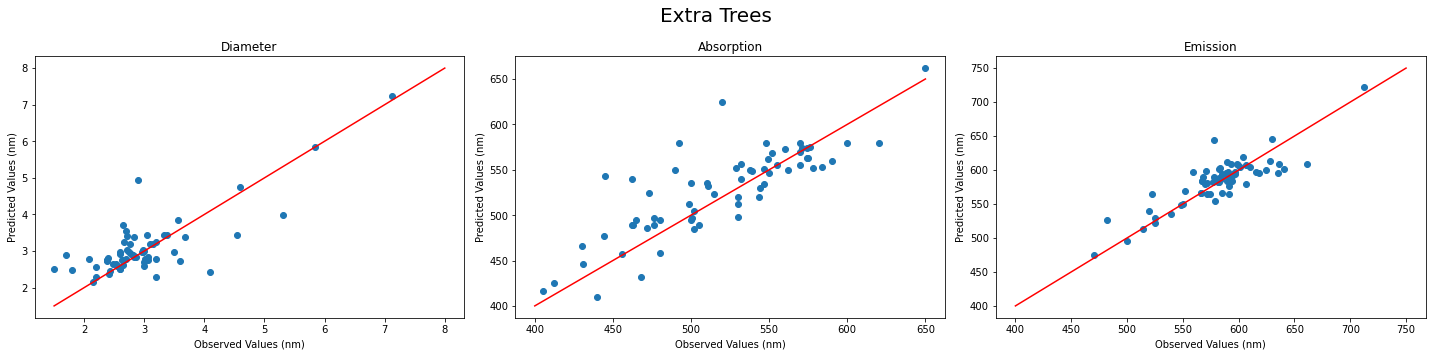

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Extra Trees', fontsize=20)

ax1.plot(Y_test.iloc[:, 0], pd.DataFrame(ET_Y_pred).loc[:, 0],'o')
ax1.plot([1.5,8],[1.5,8], color = 'r')
ax1.set_title('Diameter')
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax2.plot(Y_test.iloc[:, 1], pd.DataFrame(ET_Y_pred).loc[:, 1],'o')
ax2.plot([400,650],[400,650], color = 'r')
ax2.set_title('Absorption')
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax3.plot(Y_test.iloc[:, 2], pd.DataFrame(ET_Y_pred).loc[:, 2],'o')
ax3.plot([400,750],[400,750], color = 'r')
ax3.set_title('Emission')
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
fig.tight_layout()

In [15]:
importance_dict = dict()
for i in range(0,71):
    importance_dict[input_col[i]] = ET_regr.feature_importances_[i]

sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

top5 = DataFrame(sorted_importance[0:5], columns=['features', 'importance score'])

others = DataFrame(sorted_importance[5:], columns=['features', 'importance score'])

combined_others = pd.DataFrame(data = {
    'features' : ['others'],
    'importance score' : [others['importance score'].sum()]
})

#combining top 5 with others
imp_score = pd.concat([top5, combined_others])

sorted_importance


[('temp_c', 0.13876250874417737),
 ('time_min', 0.08309996439284952),
 ('x6_None', 0.07756611347841309),
 ('x6_zinc iodide', 0.07317854358379942),
 ('x0_indium oxalate', 0.06966420937450525),
 ('x4_trioctylphosphine oxide', 0.05563631693959756),
 ('x6_zinc oleate', 0.04903404605966605),
 ('other_2_amount_mmol', 0.03597364612571195),
 ('ligand_amount_mmol', 0.035061371162061615),
 ('p_amount_mmol', 0.03460645849763473),
 ('total_volume_ml', 0.03081309881578584),
 ('other_1_amount_mmol', 0.02675362647455664),
 ('x1_phosphine gas', 0.024912911642471454),
 ('x1_tris(trimethylsilyl)phosphine', 0.020958761217988203),
 ('x0_chloroindium oxalate', 0.020275976224829764),
 ('x6_zinc bromide', 0.02023969246832892),
 ('x2_None', 0.018890065944514343),
 ('in_amount_mmol', 0.017412716110863462),
 ('x7_None', 0.01698734940908806),
 ('first_sol_amount_ml', 0.014102836084583853),
 ('x6_acetic acid', 0.012160523631866964),
 ('x4_trioctylphosphine', 0.011819256673089105),
 ('x4_octylamine', 0.01108011851

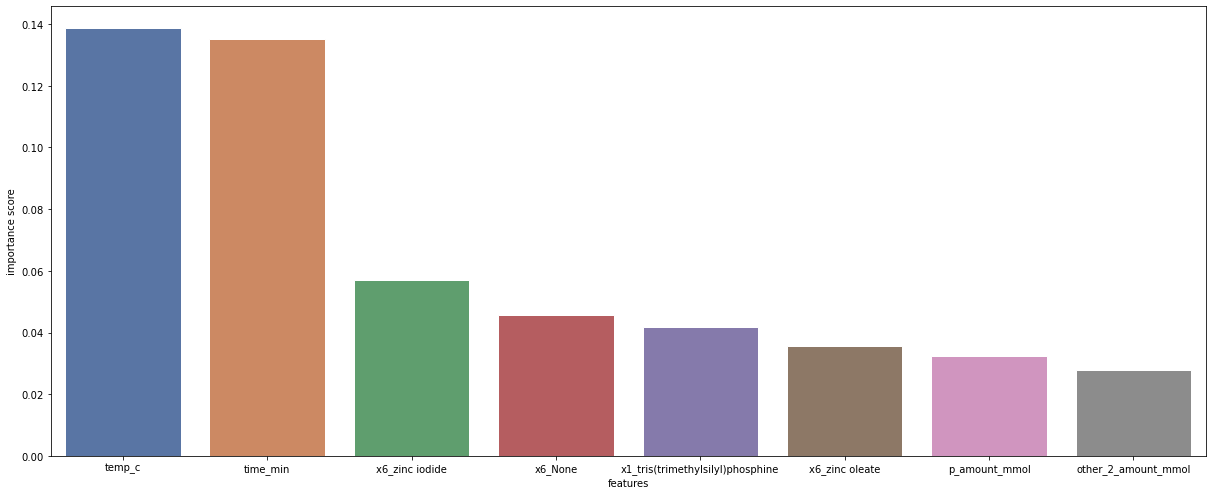

In [44]:
top7 = DataFrame(sorted_importance[0:8], columns=['features', 'importance score'])

others2 = DataFrame(sorted_importance[8:], columns=['features', 'importance score'])

# combined_others2 = pd.DataFrame(data = {
#     'features' : ['others'],
#     'importance score' : [others2['importance score'].sum()]
# })

# #combining top 10 with others
# imp_score2 = pd.concat([top7, combined_others2])

import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7)

In [8]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [6]:
FeatureMatrix = ['in_amount_mmol', 'p_amount_mmol', 'ligand_amount_mmol',
       'first_sol_amount_ml', 'second_sol_amount_ml', 'third_sol_amount_ml',
       'other_1_amount_mmol', 'other_2_amount_mmol', 'total_volume_ml',
       'temp_c', 'time_min']

Output = ['diameter_nm', 'emission_nm', 'abs_nm']

FeatureMatrix_and_outputs = ['in_amount_mmol', 'p_amount_mmol', 'ligand_amount_mmol',
       'first_sol_amount_ml', 'second_sol_amount_ml', 'third_sol_amount_ml',
       'other_1_amount_mmol', 'other_2_amount_mmol', 'total_volume_ml',
       'temp_c', 'time_min','diameter_nm', 'emission_nm', 'abs_nm']
df_corr = df[FeatureMatrix_and_outputs]
df_corr

,in_amount_mmol,p_amount_mmol,ligand_amount_mmol,first_sol_amount_ml,second_sol_amount_ml,third_sol_amount_ml,other_1_amount_mmol,other_2_amount_mmol,total_volume_ml,temp_c,time_min,diameter_nm,emission_nm,abs_nm
0,0.154575,-0.011188,-0.247025,-0.673379,-0.370637,-0.096002,0.865472,-0.146249,-0.660116,1.573235,-0.282373,1.750000,539.0,480.0
1,0.195883,0.280681,-0.439228,-0.658075,-0.370637,-0.096002,-0.675365,-0.146249,-0.653603,0.975942,3.449771,2.610000,688.5,610.0
2,-0.423738,-0.412509,-0.439228,-0.655198,-0.370637,-0.096002,0.457150,-0.146249,-0.651010,-0.815937,-0.282373,3.088889,595.0,560.0
3,-0.423738,-0.412509,-0.439228,-0.655198,-0.370637,-0.096002,0.457150,-0.146249,-0.651010,-0.218644,-0.282373,3.233333,635.0,590.0
4,0.154575,-0.011188,-0.247025,-0.604513,-0.370637,-0.096002,0.865472,-0.146249,-0.596878,-0.815937,-0.256274,2.383333,500.0,482.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0.154575,-0.376755,0.713993,4.491519,-0.370637,-0.096002,-0.675365,-0.146249,4.075133,0.975942,-0.151879,4.000000,630.0,585.0
211,7.590031,7.504453,-0.439228,5.524499,-0.370637,-0.096002,-0.675365,-0.146249,5.023700,-1.214132,-0.204076,2.833333,550.0,465.0
212,2.633061,0.718486,4.173657,6.213152,4.521657,-0.096002,-0.675365,-0.146249,6.288457,0.776845,-0.307602,1.933333,595.0,465.0
213,2.633061,0.718486,4.173657,6.213152,4.521657,-0.096002,-0.675365,-0.146249,6.288457,0.776845,-0.291073,3.033333,595.0,495.0


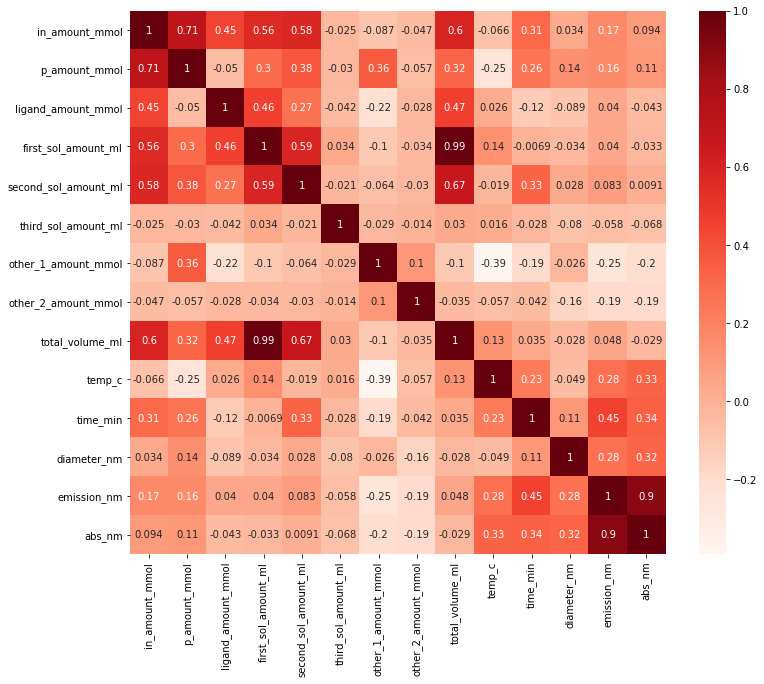

In [9]:

X_cor = df[FeatureMatrix]  #Feature Matrix
y_cor = df[Output]          #Target Variable

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_corr.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [14]:
#Correlation with output variable
cor_target = abs(cor['diameter_nm'])+abs(cor['emission_nm'])+abs(cor['abs_nm'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.0]
relevant_features.sort_values()

total_volume_ml         0.103975
first_sol_amount_ml     0.106628
second_sol_amount_ml    0.119982
ligand_amount_mmol      0.171658
third_sol_amount_ml     0.207125
in_amount_mmol          0.301733
p_amount_mmol           0.417005
other_1_amount_mmol     0.482492
other_2_amount_mmol     0.540417
temp_c                  0.660389
time_min                0.902663
diameter_nm             1.598087
emission_nm             2.174493
abs_nm                  2.222409
dtype: float64